In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import seaborn as sns
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data
from src.visualization.vis_LSTM_p.main import main_visualize
import numpy as np
import matplotlib.pyplot as plt
from src.dst.metrics.AUC import AUC


## bayes opt

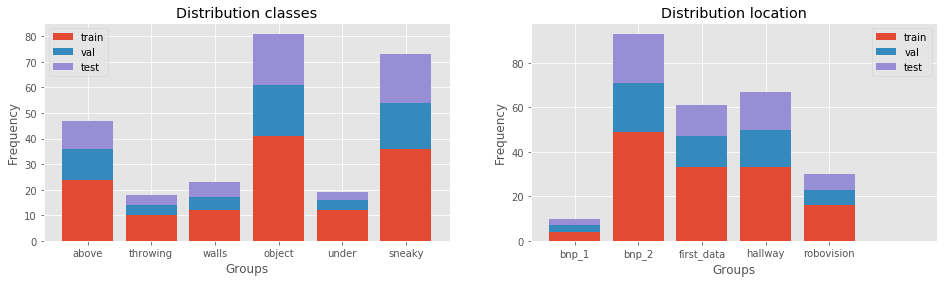

0.7134902394733854


In [2]:
path                              =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                = retrieve_data()
data,dict_,path_best,hist_best    = RD.get_best_D1(path)
BO_vis                            = plotting_tool(dict_)

BO_vis.plot_dist(data)
print(data['AUC_v'])

### DEEP1

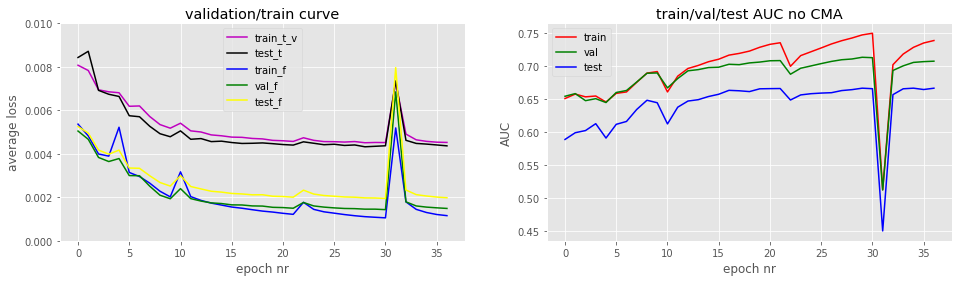

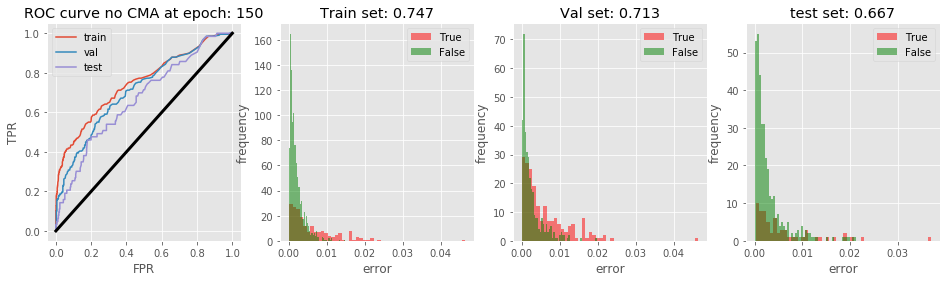

In [38]:
class output_transformations():
    
    def __init__(self):
        pass
    
    def main(self,data,output_f):
        
        list_df = ['df_t_test','df_t_val_train', 'df_f_train', 'df_f_val', 'df_f_test']
        for df in list_df:

            if(output_f == 'sigmoid_FL'):
                data[df] = self.sigmoid_FL(data[df])    

            if(output_f == 'mean_OL'):
                data[df] = self.mean(data[df])
            
            if(output_f == 'sigmoid_OL'):
                data[df] = self.sigmoid_OL(data[df])
            if(output_f == 'max'):
                data[df] = self.max_(data[df])                
        
        
        return data
            

    def sigmoid_FL(self,df):
        df['error_e'] = list(map(self.sigmoid,df['error_e']))
        return df
        
    def mean(self,df):
        df['error_v'] = list(map(self.get_error_mean,df['error_e']))
        return df

    def sigmoid_OL(self,df):
        df['error_v'] = list(map(self.get_error_ML,df['error_e']))
        return df        
    
    def max_(self,df):
        df['error_m'] = list(map(self._get_error_m,df['error_v']))
        return df        
    
    def sigmoid(self,x):    
        return 1 / (1 + np.exp(-x))
    
    def get_error_mean(self,row):
        return np.mean(row, axis = 1)
    
    def get_error_ML(self,row):
        x = np.mean(row, axis = 1)
        return 1 / (1 + np.exp(-x))
    
    def _get_error_m(self,row):
        
        e_f = np.max(row)
        return e_f          

data,dict_,path_best,hist_best    = RD.get_best_D1(path)
data['path_o'] = './models/segmentated_shuffle/bayes_opt/DEEP2/' + data['path_o'][-3:]
BO_vis.save_plots_no_cma(data)


In [39]:
data    = output_transformations().main(data,'sigmoid_FL')
data    = output_transformations().main(data,'mean_OL')
data    = output_transformations().main(data,'max')

In [40]:
AUC_                = AUC({'resolution_AUC':1000})
AUC_tr, FPR, TPR       = AUC_.get_AUC_score( data['df_t_val_train']['error_m'],  data['df_f_train']['error_m'])
AUC_v, FPR_v, TPR_v = AUC_.get_AUC_score( data['df_t_val_train']['error_m'],    data['df_f_val']['error_m'])
AUC_t, FPR_t, TPR_t = AUC_.get_AUC_score( data['df_t_test']['error_m'],   data['df_f_test']['error_m'])
data['AUC']   = AUC_tr
data['AUC_v'] = AUC_v
data['AUC_t'] = AUC_t

data['FPR']   = FPR
data['TPR']   = TPR

data['FPR_v'] = FPR_v
data['TPR_v'] = TPR_v

data['FPR_t'] = FPR_t
data['TPR_t'] = TPR_t

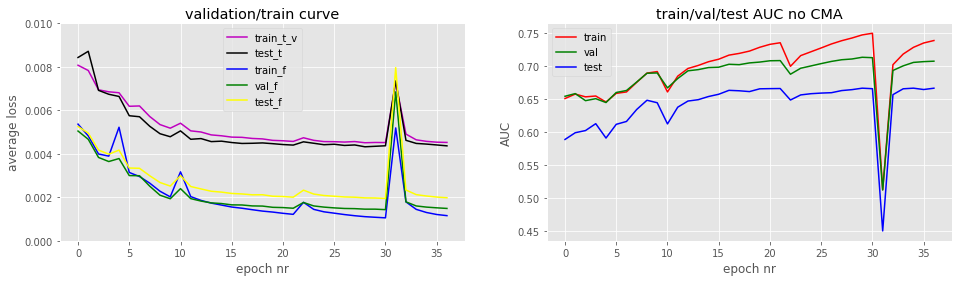

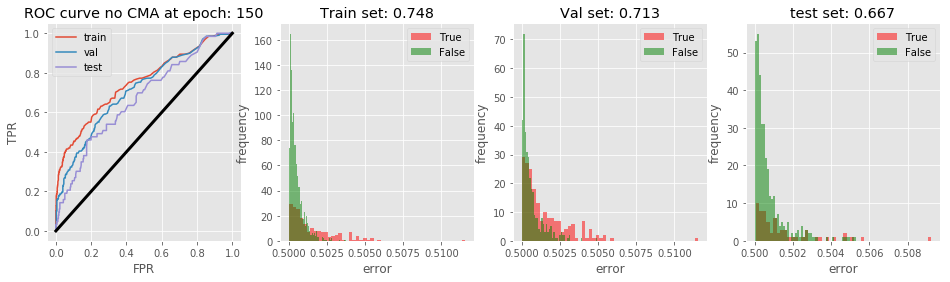

In [41]:
BO_vis.save_plots_no_cma(data)

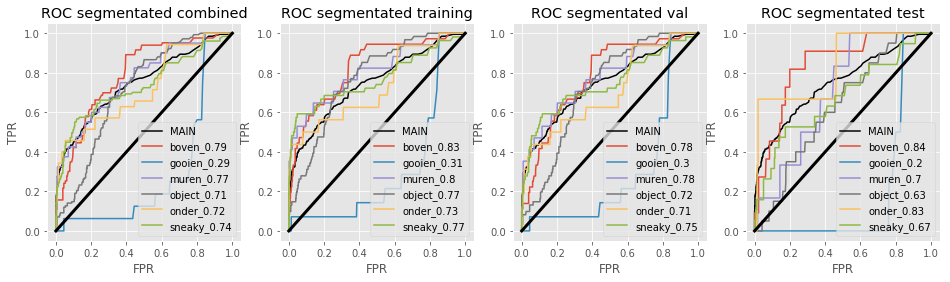

In [42]:
data_s = BO_vis._get_data_segmented(data,'segmentation')
BO_vis.save_ROC_segment(data_s,'segmentation')

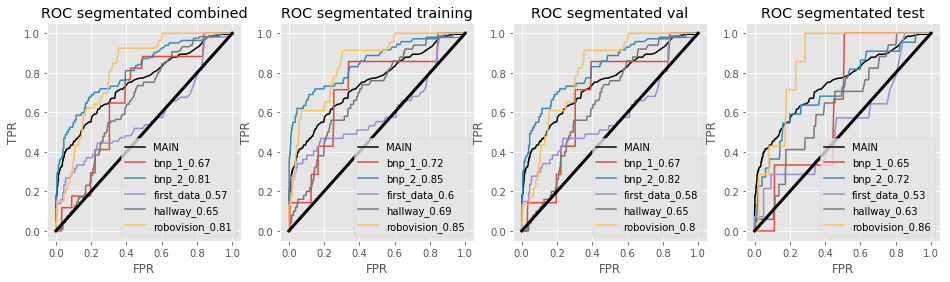

In [43]:
data_s = BO_vis._get_data_segmented(data,'location')
BO_vis.save_ROC_segment(data_s,'location')

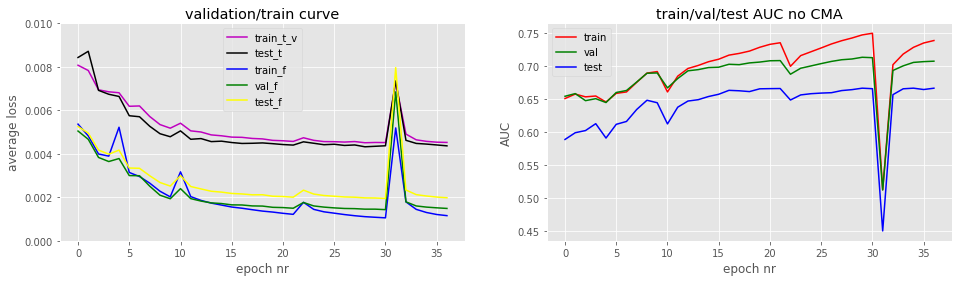

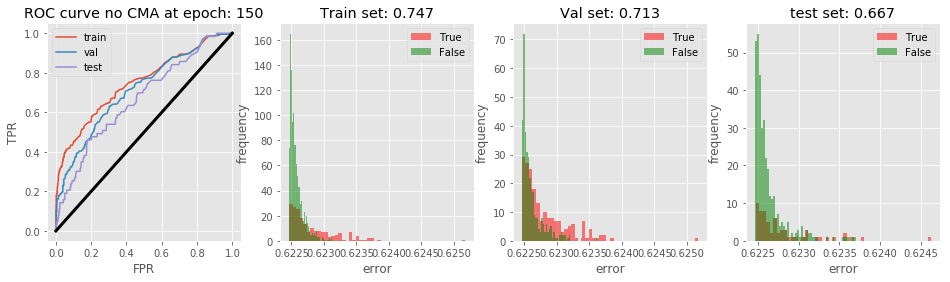

In [44]:
data,dict_,path_best,hist_best    = RD.get_best_D1(path)
data['path_o'] = './models/segmentated_shuffle/bayes_opt/DEEP2/' + data['path_o'][-3:]
data    = output_transformations().main(data,'sigmoid_FL')
data    = output_transformations().main(data,'mean_OL')
data    = output_transformations().main(data,'sigmoid_OL')
data    = output_transformations().main(data,'max')

AUC_                = AUC({'resolution_AUC':1000})
AUC_tr, FPR, TPR    = AUC_.get_AUC_score( data['df_t_val_train']['error_m'],  data['df_f_train']['error_m'])
AUC_v, FPR_v, TPR_v = AUC_.get_AUC_score( data['df_t_val_train']['error_m'],    data['df_f_val']['error_m'])
AUC_t, FPR_t, TPR_t = AUC_.get_AUC_score( data['df_t_test']['error_m'],   data['df_f_test']['error_m'])
data['AUC']   = AUC_tr
data['AUC_v'] = AUC_v
data['AUC_t'] = AUC_t

data['FPR']   = FPR
data['TPR']   = TPR

data['FPR_v'] = FPR_v
data['TPR_v'] = TPR_v

data['FPR_t'] = FPR_t
data['TPR_t'] = TPR_t

BO_vis.save_plots_no_cma(data)